## Check the thresholding of gene expression

Genes are thresholded based on the following expression rules:
  - TPM >= tpm_threshold in >= sample_frac_threshold * samples
  - read counts >= count_threshold in sample_frac_threshold * samples

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#plt.switch_backend('agg')
import matplotlib
import sys
sys.path.append('../')
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 18, colors = 'banskt', dpi = 72)

def read_gct(gct_file):
    df = pd.read_csv(gct_file, sep='\t', skiprows=2, index_col=0)
    df.drop('Description', axis=1, inplace=True)
    df.index.name = 'gene_id'
    colnames = ['-'.join(x.split('-')[:2]) for x in df.columns]
    df.columns = colnames
    return df

def read_samples(sample_file):
    with open(sample_file, 'r') as infile:
        content = infile.readlines()
    samples = [x.strip() for x in content]
    return samples

In [2]:
tissuedir = "/scratch/sbanerj/trans-eqtl/input/gtex_v8/preprocess_gx/Adipose_Subcutaneous"
tpmfile = os.path.join(tissuedir, "all_genes_tpm.gct")
countsfile = os.path.join(tissuedir, "all_genes_counts.gct")
vcf_sample_list = os.path.join( tissuedir,  "../vcf_samples.list")

In [3]:
tpm_df = read_gct(tpmfile)
counts_df = read_gct(countsfile)

gxdonors = list(tpm_df.columns)
genes = list(tpm_df.index)
gtdonors = read_samples(vcf_sample_list)
common_ix = [x for x in gxdonors if x in gtdonors]
tpm_df = tpm_df[common_ix]
counts_df = counts_df[common_ix]

In [10]:
tpm_threshold = 0.1
sample_frac_threshold = 0.2
count_threshold = 6

ns = tpm_df.shape[1]
mask = (
    (np.sum(tpm_df >= tpm_threshold, axis = 1) >= sample_frac_threshold * ns) &
    (np.sum(counts_df >= count_threshold, axis = 1) >= sample_frac_threshold * ns)
).values

tpm_df_masked = tpm_df.loc[mask]
counts_df_masked = counts_df.loc[mask]

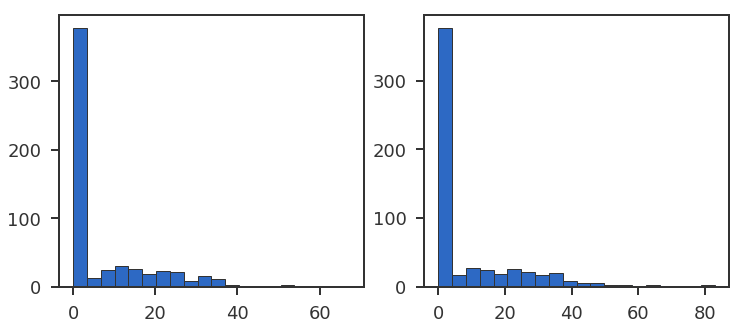

In [11]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
geneix = 6
ax1.hist(tpm_df_masked.loc[tpm_df_masked.index[geneix]])
ax2.hist(counts_df_masked.loc[counts_df_masked.index[geneix]])
plt.show()